# EDS 220 Fall 2022
# Data quality control and outliers: 1D time series

Dealing with data quality issues is an inevitable feature of working with any kind of data, and environmental data is no exception. We'll make a start at learning about these issues using simple one-dimensional time series information, before working up to more complex datasets.

Our example will be the precipitation during 2013 in Boulder, Colorado. This city is located on the eastern edge of the Rocky Mountains, and experiences lots of interesting weather as a result. In 2013, an unusual weather pattern led to some of the most intense precipitation ever recorded in the region, causing devastating floods throughout the Colorado Front Range.

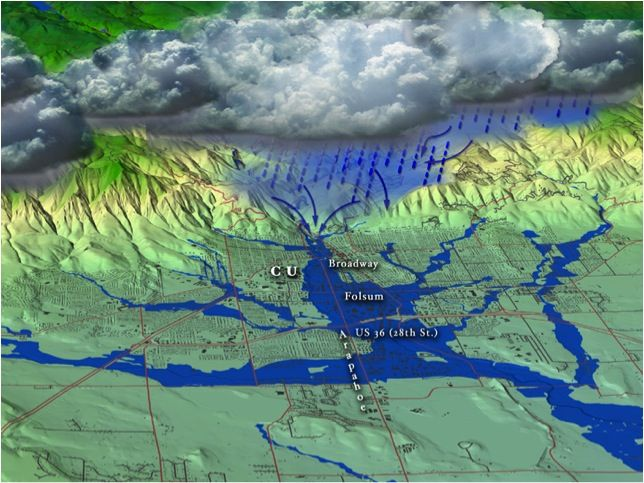

(image: Boulder, CO 100-year floodplain. "CU" = University of Colorado at Boulder)

Precipitation data from the [NOAA Climate Data Online](https://www.ncdc.noaa.gov/cdo-web/) service has been downloaded into the class repository (`Precipitation_BoulderCO_2013.csv`). This file contains 15-minute precipitation averages calculated from weather stations around Boulder, and will be read in using Pandas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The chunk below reads in the CSV-formatted data file and converts it into a Pandas data frame:

In [12]:
# Read in data file into a Pandas data frame
dat = pd.read_csv('Precip_BoulderCO_COOPstation.csv') 

Now that the data have been read in, we can take a look at some basic information using the `.head()` command:

In [13]:
# Display header information for data frame
dat.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,20130101 01:00,0.0,g,
1,COOP:050843,BOULDER 2 CO US,20130128 16:00,0.1,,
2,COOP:050843,BOULDER 2 CO US,20130129 01:00,0.1,,
3,COOP:050843,BOULDER 2 CO US,20130201 01:00,0.0,g,
4,COOP:050843,BOULDER 2 CO US,20130214 16:00,0.1,,


You can also get an idea of what's going on with an individual data file using the `describe` function:

In [14]:
# Describe HPCP data
dat['HPCP'].describe()

count    233.000000
mean      17.310129
std      130.154365
min        0.000000
25%        0.100000
50%        0.100000
75%        0.100000
max      999.990000
Name: HPCP, dtype: float64

Take a few minutes to look through the metadata fields, both from the output above and from the data description file in the class repository (PRECIP_15_documentation.pdf).

Try to determine:
- The units of precipitation
- What the different measurement and quality fields indicate

Then to plot the data, we can use the usual Matplotlib commands. 

It will make life easier if we first convert the units of time in the data frame to something that Pandas understands: we can use `pd.to_datetime()` to force the date information to [use the Pandas datetime format](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html).

In [15]:
# Convert date to Pandas datetime
dat['DATE']=pd.to_datetime(dat['DATE'])

Now let's see what the data look like!

(0.0, 1.5)

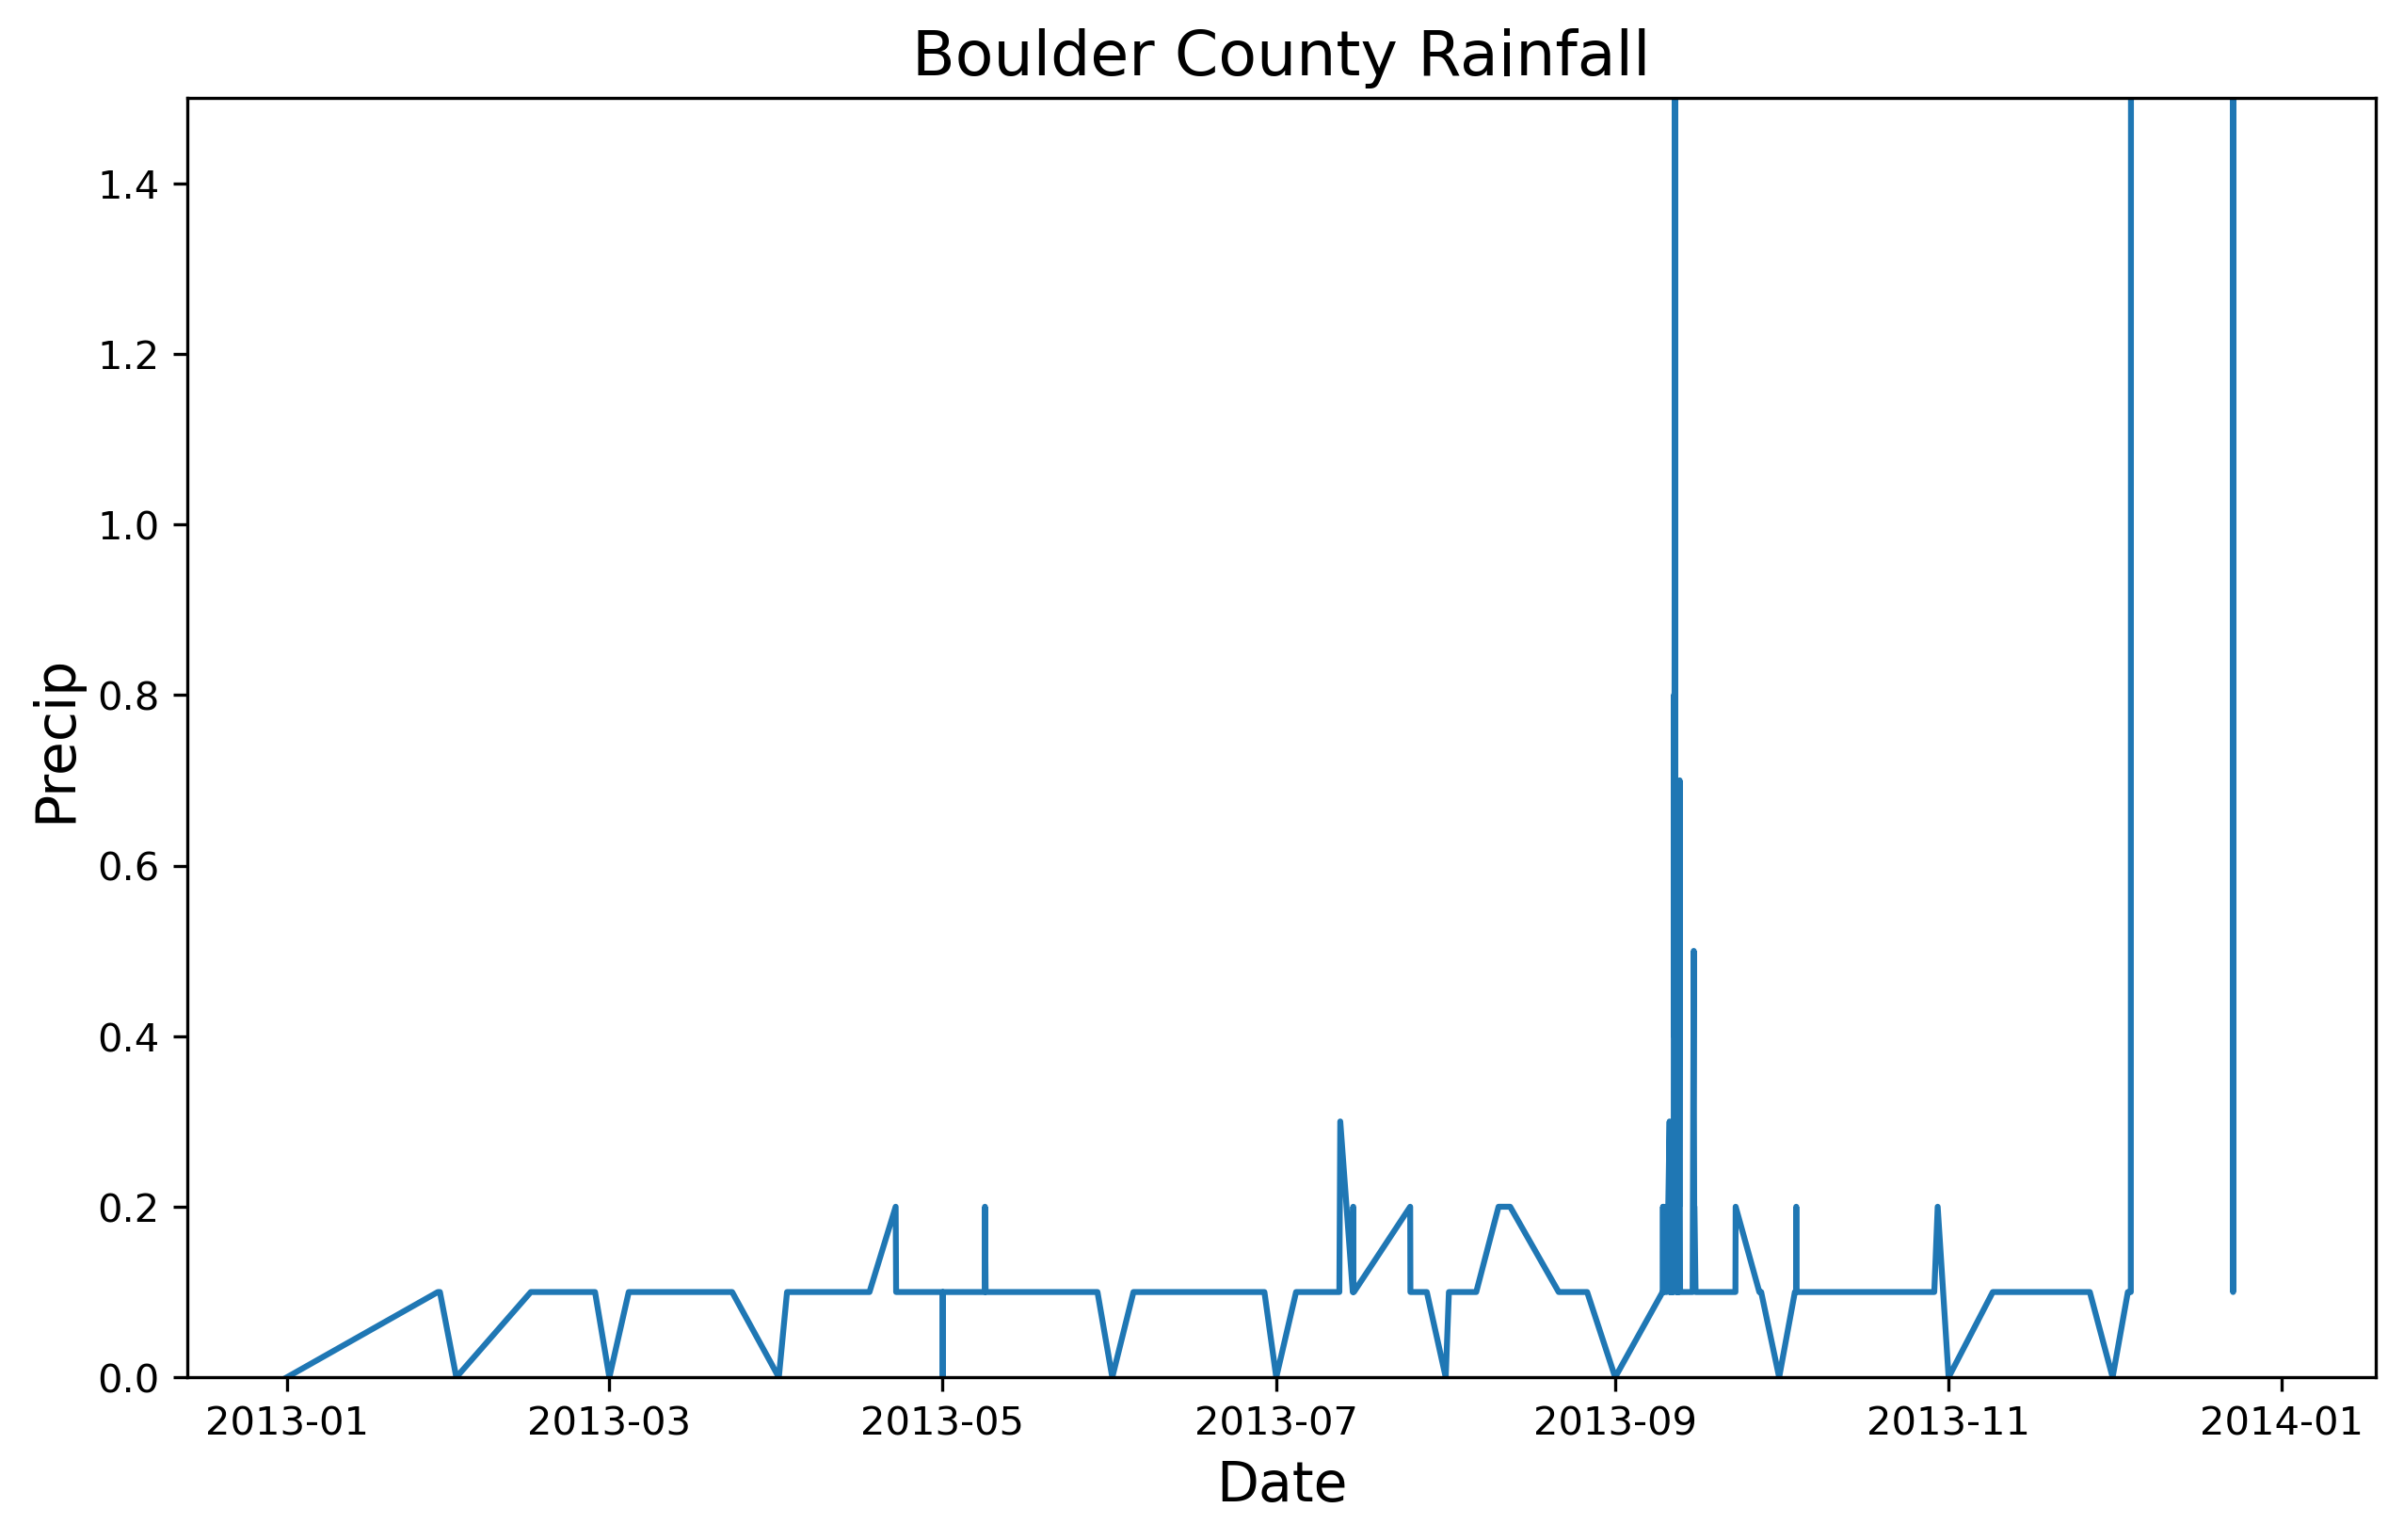

In [16]:
# create a new figure, set size and resolution (dpi)
plt.figure(figsize=(10, 6), dpi=300)    
# add data to the plot
plt.plot(dat['DATE'],dat['HPCP'])   
# add title
plt.title('Boulder County Rainfall', fontsize=16)
# add x and y labels
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precip', fontsize=14)
# set y limit
plt.ylim(0, 1.5)

The plot above looks.... a little messy. That's ok! We just need to make some decisions about how to clean things up. Based on our reviewing of the metadata and data description, we can eliminate some of the missing data to make the plot appear cleaner. This can be accomplished by setting the `HPCP` field values associated with outliers to NaN (not a number), using `np.nan`:

In [17]:
# Get rid of HPCP outliers
dat[dat.HPCP > 999]=np.nan
dat[dat.HPCP < -999]=np.nan

Rerunning the `head` command will show us what this did!

In [18]:
dat.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,2013-01-01 01:00:00,0.0,g,
1,COOP:050843,BOULDER 2 CO US,2013-01-28 16:00:00,0.1,,
2,COOP:050843,BOULDER 2 CO US,2013-01-29 01:00:00,0.1,,
3,COOP:050843,BOULDER 2 CO US,2013-02-01 01:00:00,0.0,g,
4,COOP:050843,BOULDER 2 CO US,2013-02-14 16:00:00,0.1,,


(0.0, 1.5)

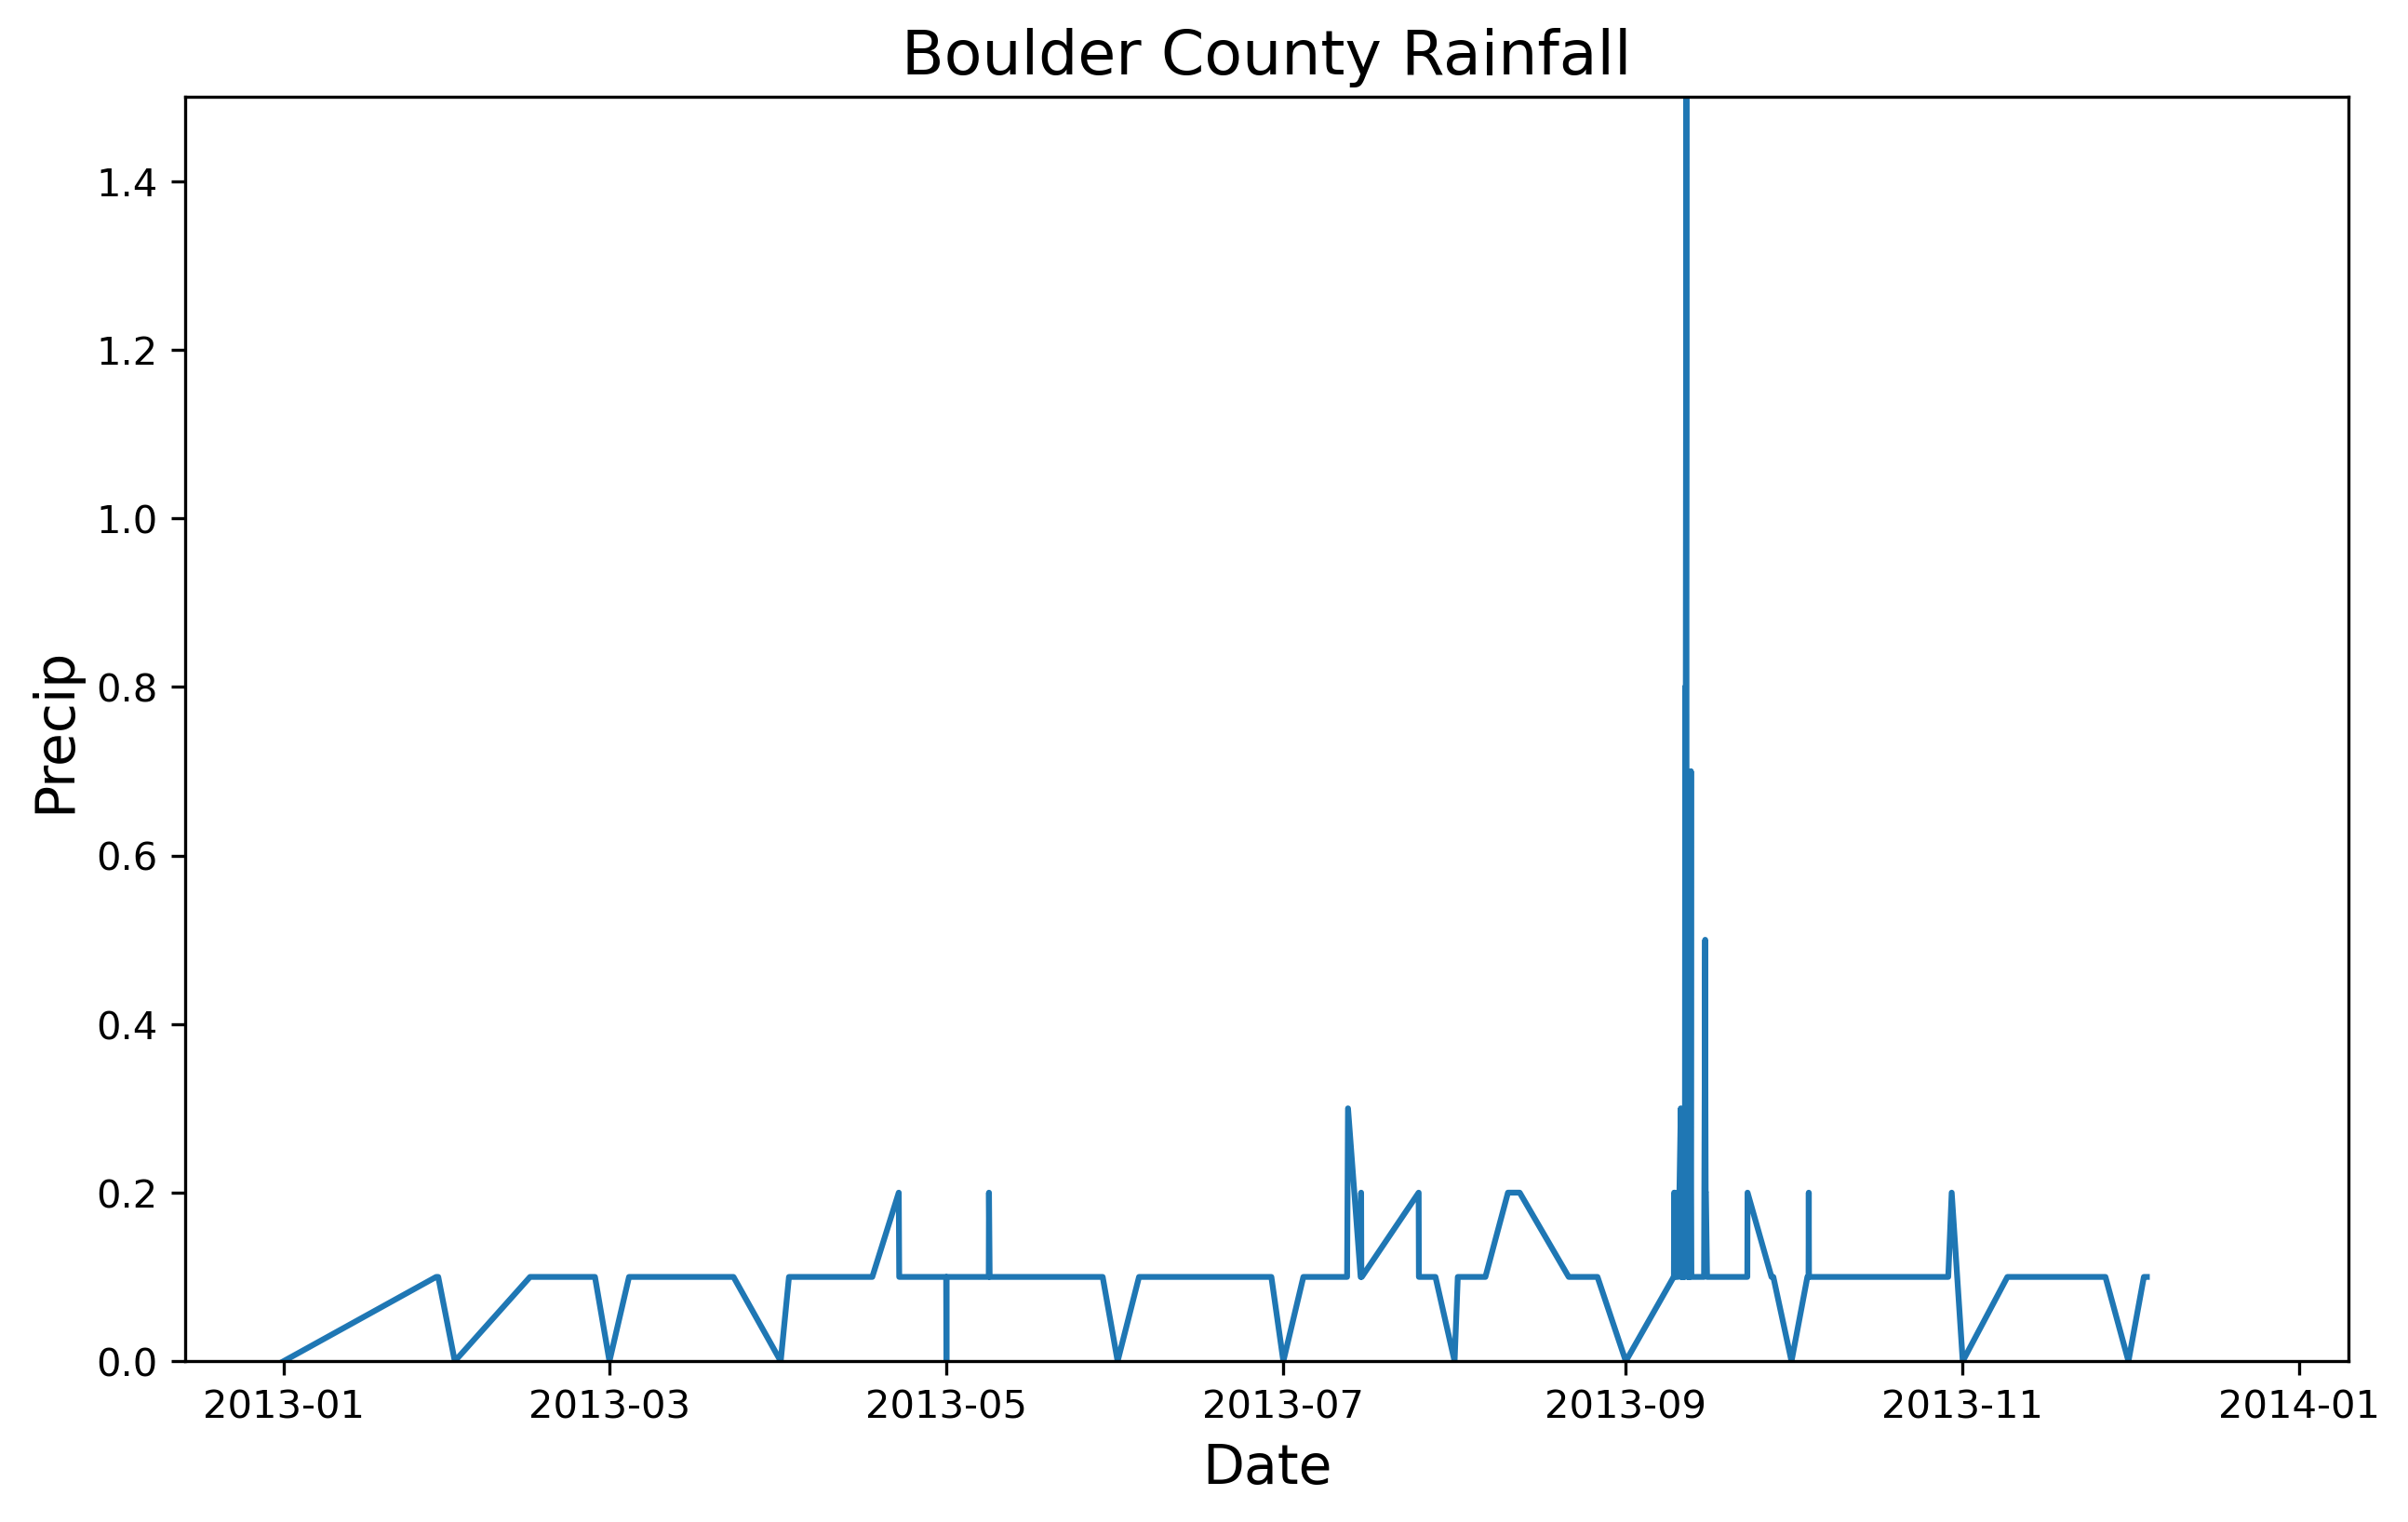

In [19]:
# create a new figure, set size and resolution (dpi)
plt.figure(figsize=(10, 6), dpi=300)    
# add data to the plot
plt.plot(dat['DATE'],dat['HPCP'])   
# add title
plt.title('Boulder County Rainfall', fontsize=16)
# add x and y labels
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precip', fontsize=14)
# set y limit
plt.ylim(0, 1.5)